In [234]:
import nltk
import requests
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown as md
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SKENNEDY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SKENNEDY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [235]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [269]:
def summarize_text(url='http://www.gutenberg.org/files/15659/15659.txt',
                   title='2nd Grade Reader',
                   text_min=5,
                   start_text='CONTENTS',
                   show_top=20):
    display(md(f'***Text Summary {url} / {title}***'))
    text = requests.get(url).text
    start_index = text.find(start_text)
    text = text[start_index + len(start_text):].lower()
    text_sub = re.sub('[^A-Za-z0-9]+', ' ', text)
    display(md(f'{text_sub[:100]}'))
    tokens = word_tokenize(text_sub)
    display(md(f'*Raw tokens found: {len(tokens):,.0f}*'))
    display(md(f'*Raw Vocab Size: {len(set(tokens)):,.0f}*'))
    nltk_text = nltk.Text(tokens)
    display(md(f'*Lexical Diversity: {lexical_diversity(nltk_text):,.2%}*'))
    fdist = nltk.FreqDist(nltk_text)
    display(
        pd.DataFrame.from_dict(fdist, orient='index').rename(columns={
            0: 'count'
        }).sort_values(['count'], ascending=False).head(show_top))
    plt.figure(figsize=(20,10))
    p = fdist.plot(show_top, cumulative=True)
    p.set_yticklabels([f'{y:,.0f}' for y in p.get_yticks()])
    display(md(f'*Cleaning text....text_min:{text_min}...*'))
    stop_words = set(stopwords.words('english'))
    filtered_text = ' '.join(
        [w for w in nltk_text if not w in stop_words and len(w) > text_min])
    tokens_filtered = word_tokenize(filtered_text)
    display(md(f'*Filtered tokens found: {len(tokens_filtered):,.0f}*'))
    display(md(f'*Filtered Vocab Size: {len(set(tokens_filtered)):,.0f}*'))
    nltk_text_filtered = nltk.Text(tokens_filtered)
    display(md(f'*Lexical Diversity: {lexical_diversity(nltk_text_filtered):,.2%}*'))
    fdist_filtered = nltk.FreqDist(nltk_text_filtered)
    display(
        pd.DataFrame.from_dict(fdist_filtered,
                               orient='index').rename(columns={
                                   0: 'count'
                               }).sort_values(['count'],
                                              ascending=False).head(show_top))
    plt.figure(figsize=(20,10))
    p = fdist_filtered.plot(show_top, cumulative=True)
    p.set_yticklabels([f'{y:,.0f}' for y in p.get_yticks()])
    

***Text Summary http://www.gutenberg.org/files/15659/15659.txt / 2nd Grade Reader***

 page the ship old english rhyme 13 the wolf and the seven young kids william and jacob grimm 14 the

*Raw tokens found: 24,048*

*Raw Vocab Size: 3,876*

*Lexical Diversity: 16.12%*

,count
the,1696
and,694
to,550
a,502
of,437
in,339
he,294
you,253
was,247
i,197


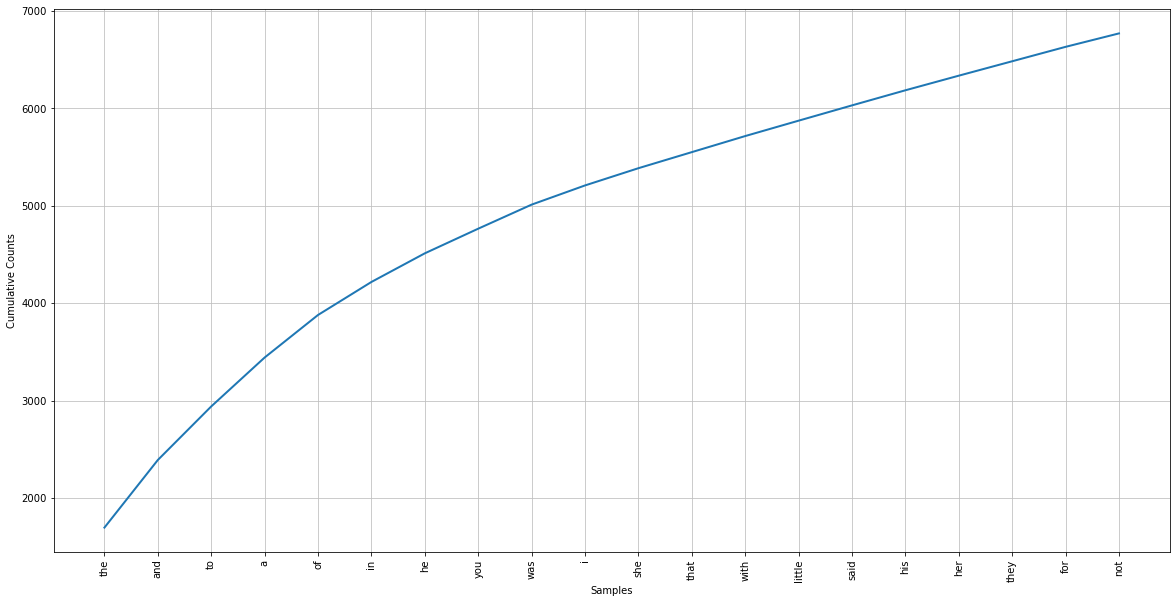

*Cleaning text....text_min:5...*

*Filtered tokens found: 4,627*

*Filtered Vocab Size: 1,639*

*Lexical Diversity: 35.42%*

,count
little,158
gutenberg,89
project,84
illustration,69
mother,65
margery,38
people,32
morning,30
electronic,27
foundation,25


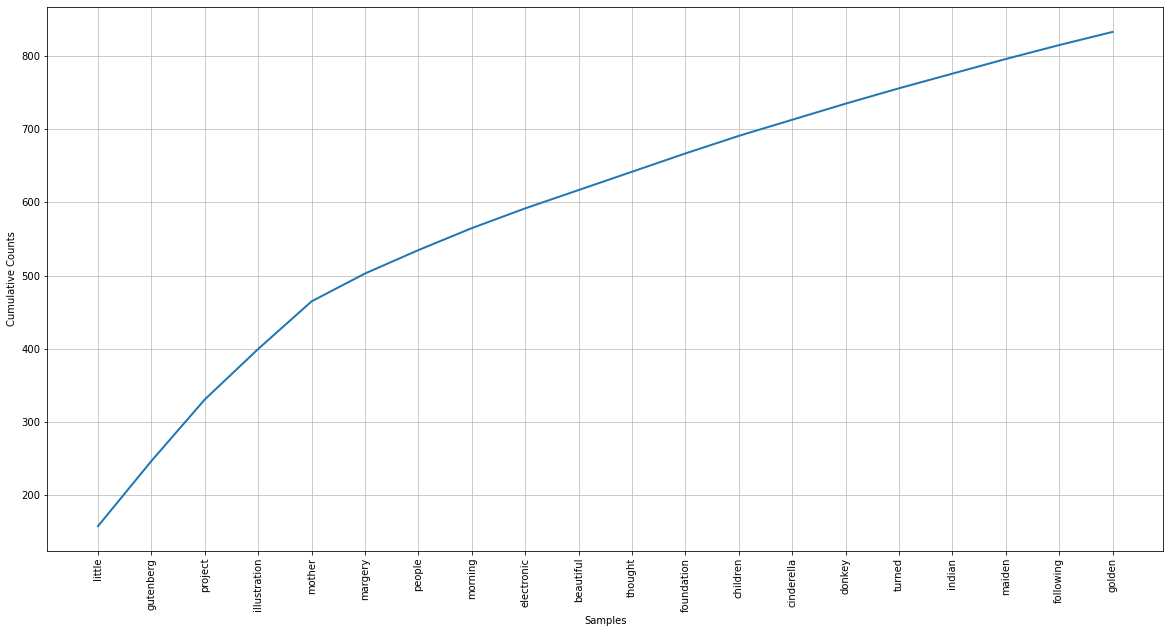

In [270]:
summarize_text()

***Text Summary http://www.gutenberg.org/files/16751/16751.txt / 6th Grade***

 title author page 1 anecdote of the duke of newcastle blackwood s magazine 63 2 the needle samuel w

*Raw tokens found: 142,171*

*Raw Vocab Size: 14,405*

*Lexical Diversity: 10.13%*

,count
the,9336
and,5455
of,5361
to,3025
a,2972
in,2879
his,2093
he,1775
was,1556
is,1452


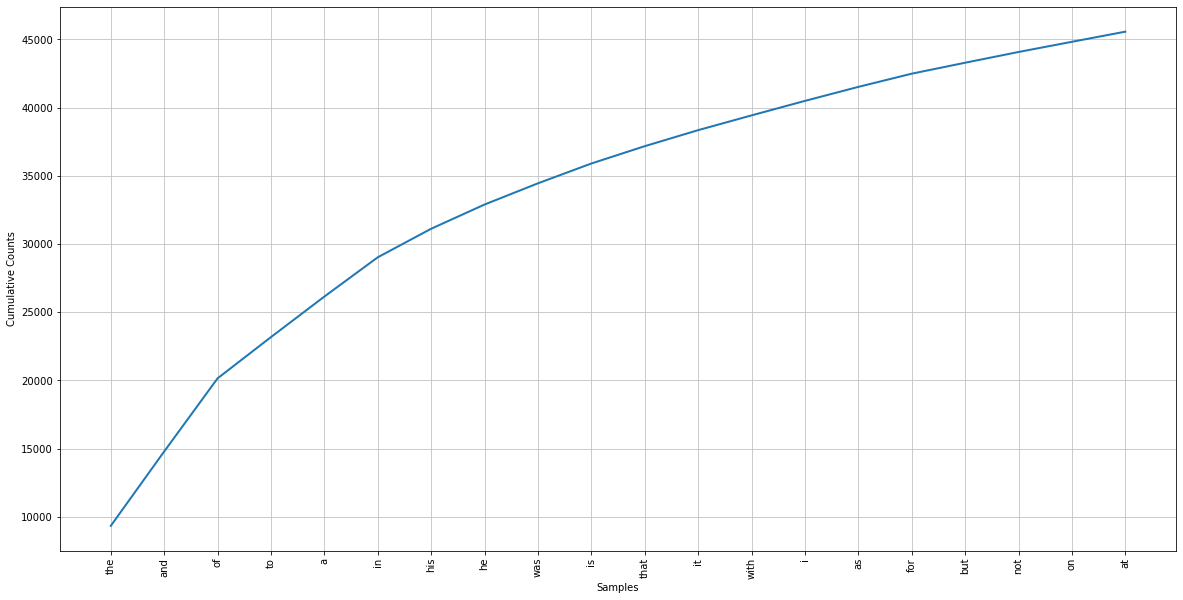

*Cleaning text....text_min:5...*

*Filtered tokens found: 37,460*

*Filtered Vocab Size: 10,339*

*Lexical Diversity: 27.60%*

,count
little,144
without,129
though,93
gutenberg,89
father,88
project,84
heaven,84
several,82
country,81
people,80


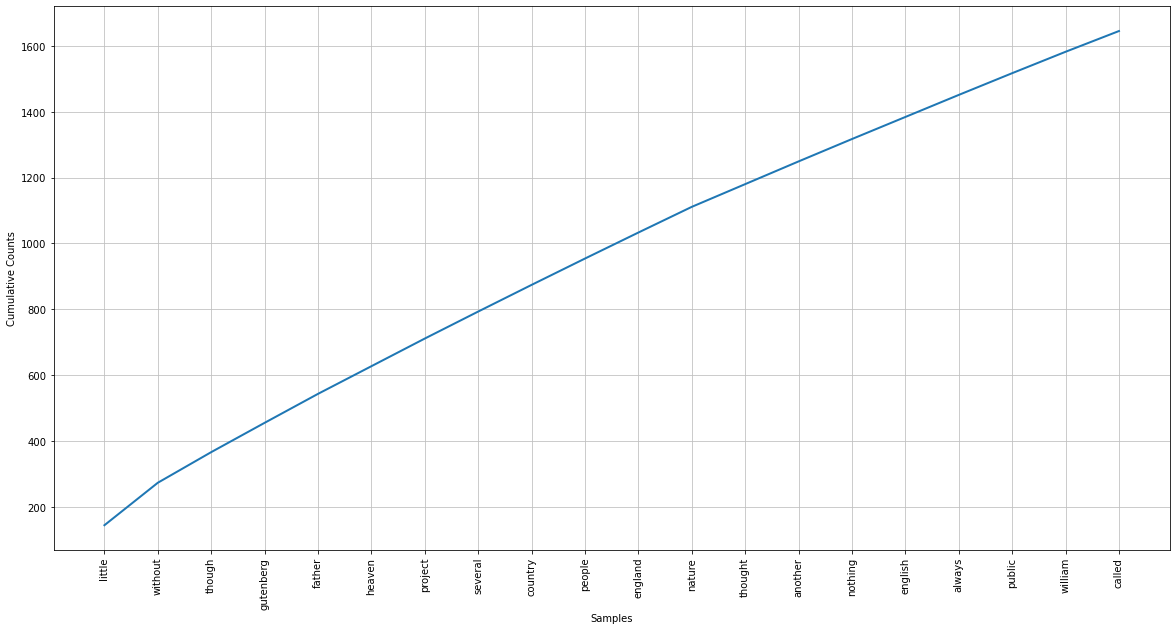

In [271]:
summarize_text('http://www.gutenberg.org/files/16751/16751.txt',
               title='6th Grade',
               start_text='SELECTIONS FOR READING. (5)')

***Text Summary http://www.gutenberg.org/files/50543/50543-0.txt / High School***

 xviii the first christmas tree henry van dyke 1 a french tar baby joel chandler harris 27 sonny s c

*Raw tokens found: 136,378*

*Raw Vocab Size: 12,305*

*Lexical Diversity: 9.02%*

,count
the,8069
and,4167
of,3695
to,3358
a,3139
he,2631
in,2016
i,1922
his,1723
was,1593


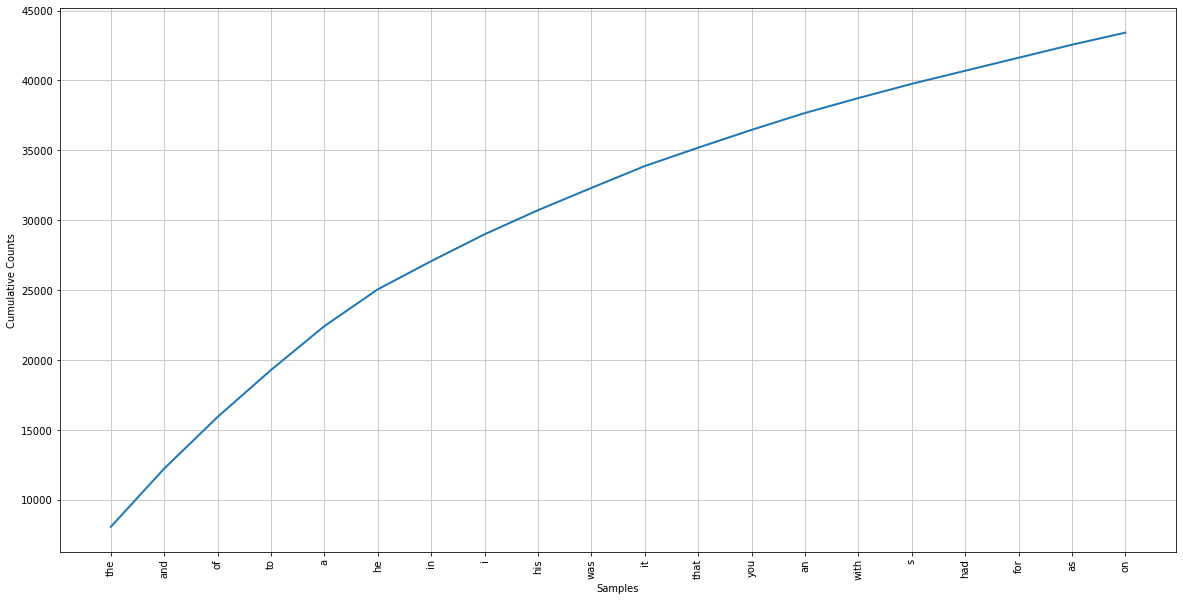

*Cleaning text....text_min:5...*

*Filtered tokens found: 29,615*

*Filtered Vocab Size: 8,651*

*Lexical Diversity: 29.21%*

,count
little,250
looked,121
gallegher,116
father,115
seemed,100
thought,98
mother,96
gutenberg,94
project,87
turned,87


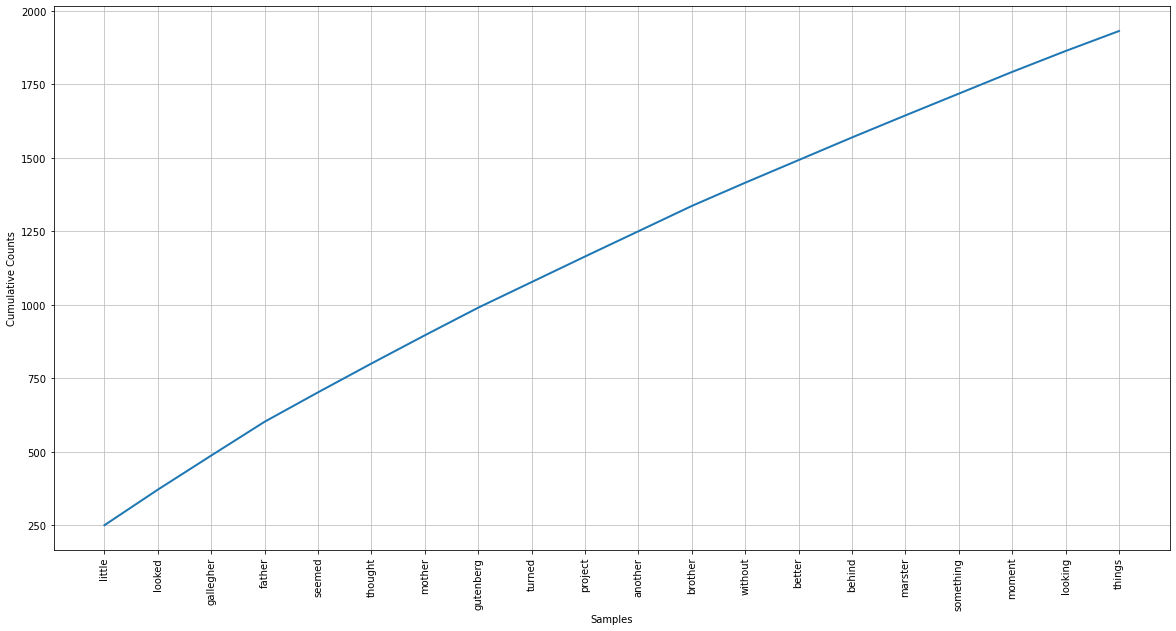

In [272]:
summarize_text('http://www.gutenberg.org/files/50543/50543-0.txt', title='High School', start_text='HOW THIS BOOK MAY BE USED')

### Lexical Diversity:

Filtering size = toss words < 5 characters in length to see if diversity improves/worsens:

The lexical diversity scores of each text were as follows (pre/post-filtering):

- 2nd Grade: 16.12%/35.42%
- 6th Grade: 10.13%/27.16%
- HS:        9.02%/29.21%

2nd grade having the highest unadjusted diversity isn't terribly surprising given the number of small words skewing the distribution. HS having the lowest filtered score is very surprising given that there is an expectation of higher complexity in the text. 



### Vocab Size:

The vocabulary sizes of each text were as follows (pre/post-filtering):

- 2nd Grade: 3,876/1,639
- 6th Grade: 14,405/10,339
- HS:        12,305/8,651

The vocabulary sizes of each text were less surprising than the lexical diversity. The HS/6th Grade readers had significantly higher vocabulary sizes than the 2nd grade counterpart. The higher numbers for 6th vs HS are somewhat surprising, but not shocking. 


Overall, vocab size and lexical diversity in tandem are probably a better method for determining the reading level of the given text. Lexical diversity by itself has a slight normalization effect since it's a ratio based metric whereas vocab size is absolute - hence the two measures together paint the same picture from different perspectiveves. An interesting metric to add would be the number of words above a particular threshold length - perhaps plotting that would give another indication of reading level (left for another day).